In [70]:
import numpy as np
import matplotlib.pyplot as plt


loaded_data = np.load('results/GSI_data.npz')
#dp_p_list = loaded_data['dp_p_list']
delta    = loaded_data['delta']
excited = loaded_data['excited']
x = loaded_data['x']*1e3
time = loaded_data['time']

delta_std = np.std(delta, axis=1)

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))

revolution_frequency = 200*1e6
s_per_turn = 1/revolution_frequency
num_turns=time/s_per_turn


plot histogram at last turn

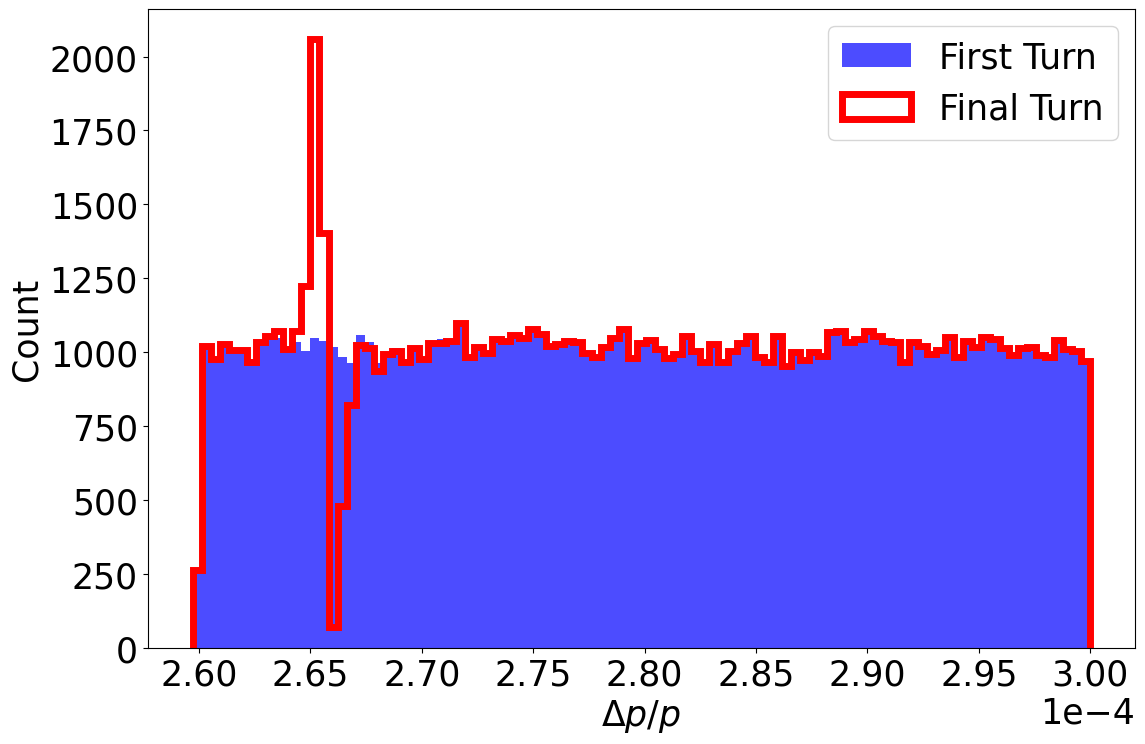

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]
bins = np.linspace(2e-4, 3e-4, 100)
bins = np.linspace(min(delta[-1]), max(delta[-1]), 100)
# Plotting for final turn
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.tight_layout()
plt.show()

plot with the lorentzian

0.00026604548428298575


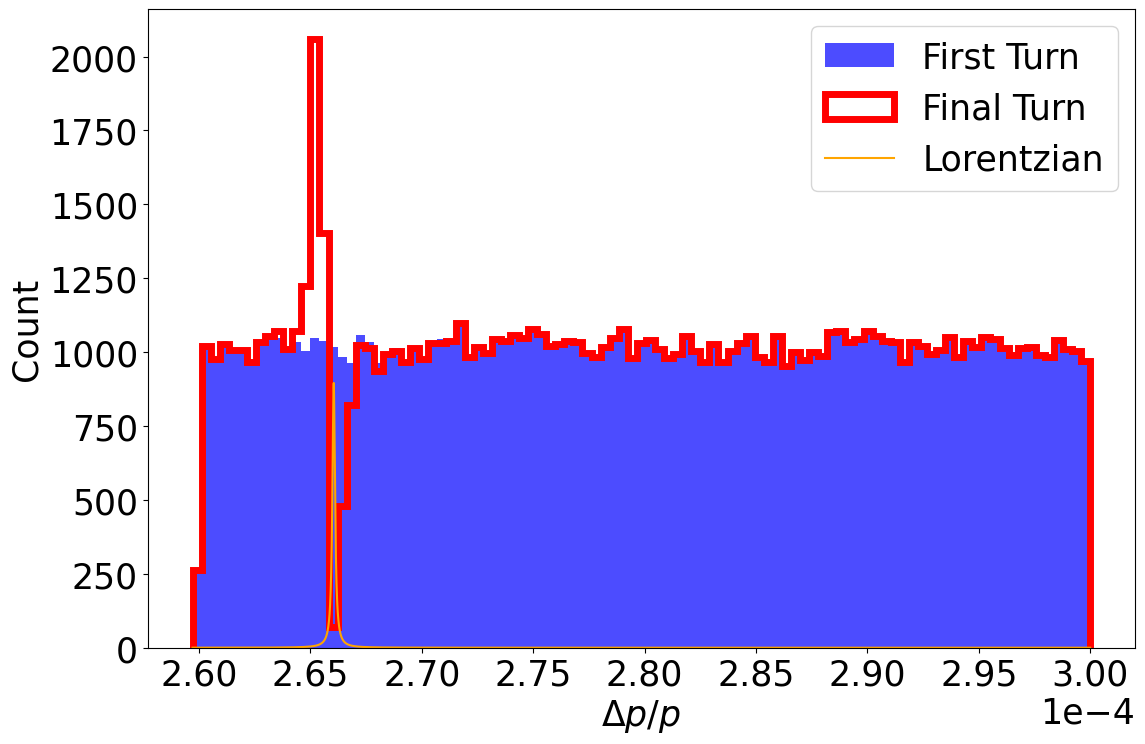

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

# Ion properties:
m_u = 931.49410242e6 # eV/c^2 -- atomic mass unit
A = 12.011 # Weight of C
Z = 6  # Number of protons in the ion (C)
Ne = 3 # Number of remaining electrons (Lithium-like)
m_e = 0.511e6 # eV/c^2 -- electron mass
m_p = 938.272088e6 # eV/c^2 -- proton mass
c = 299792458.0 # m/s

q0=Z-Ne

mass0 = A*m_u + Ne*m_e # eV/c^2

beta_rel = 0.47
gamma_rel = 1.13

p0c = mass0*beta_rel*gamma_rel #eV/c

# p0c = equiv_proton_momentum*(Z-Ne) # eV/c
gamma0 = np.sqrt( 1 + (p0c/mass0)**2 ) # ion relativistic factor
beta0 = np.sqrt(1-1/(gamma0*gamma0)) # ion beta

############################################################################################################

hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 154.82*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0

laser_wavelength=2.57557259253e-07
ion_excitation_energy=hw0
ion_excited_lifetime=3.8e-9
gamma_decay=1/ion_excited_lifetime



delta_range=np.linspace(min(delta[-1]), max(delta[-1]),int(1e6))

K1 = 8.6


pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(mass0*mass0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
excitation_prob = 0.5*K1 / ((4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1))

max_prob = np.max(excitation_prob)
max_prob_index = np.argmax(excitation_prob)

# Find the corresponding delta value
corresponding_max_delta = delta_range[max_prob_index]

print(corresponding_max_delta)

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.plot(delta_range,excitation_prob*2e3,color='orange',label='Lorentzian')
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.tight_layout()
plt.show()
